<a href="https://colab.research.google.com/github/fallsoumaya/projets_scolaires_iibs/blob/main/projets_finaux_python_iibs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📘 Projets Finaux – Python pour les Sciences de Données
### IIBS DE CO DAKAR – Année 2024-2025
**Département :** IA / DATA  
**Filière :** Licence 2 – Semestre 4  
**Enseignant :** M. Abdoulaye Wakhab DIOP  
**Étudiante :** Soumaya FALL

##  Sommaire

1. [Projet 1 : Analyse des logements Airbnb](#projet1)
    - Objectifs
    - Préparation des données
    - Nettoyage et transformation
    - Analyse exploratoire
    - Réponses aux questions
2. [Projet 2 : Prédiction du diabète](#projet2)
    - Objectifs
    - Préparation des données
    - Nettoyage et transformation
    - Analyse exploratoire
    - Réponses aux questions
3. [Conclusion](#conclusion)

## 🔍 <a name="projet1"></a>Projet 1 : Analyse des logements Airbnb

**Ville choisie :** Stockholm  
**Source des données :** [Inside Airbnb](http://insideairbnb.com/get-the-data.html)  
**Fichier utilisé :** `listings.csv`

### 🎯 Objectifs :
- Nettoyage des données (valeurs manquantes, doublons, formats).
- Transformation des variables catégorielles.
- Détection des annonces suspectes.

### Importation des bibliothèques et chargement des données

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data_airbnb = pd.read_csv('listings.csv')
data_airbnb.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,142695,https://www.airbnb.com/rooms/142695,20250627030620,2025-06-27,city scrape,Family Friendly Sleek Colorful Designer Aparment,Experience a charming and stylish apartment lo...,A calm hidden area close to the city centre,https://a0.muscache.com/pictures/hosting/Hosti...,333509,...,5.00,4.00,5.00,NaN,f,1,1,0,0,1.00
1,145320,https://www.airbnb.com/rooms/145320,20250627030620,2025-06-27,city scrape,In the middle of it all - with a view!,"My place is good for couples, friends, and sol...","The flat is in the area of Södermalm, the youn...",https://a0.muscache.com/pictures/9172a792-604c...,703851,...,4.94,4.96,4.80,NaN,f,2,0,2,0,0.72
2,164448,https://www.airbnb.com/rooms/164448,20250627030620,2025-06-28,city scrape,Double room in central Stockholm with Wi-Fi,I am renting out a nice double room on the top...,NaN,https://a0.muscache.com/pictures/f56d8d10-a7fa...,784312,...,4.97,4.84,4.76,NaN,f,2,0,2,0,2.60
3,220851,https://www.airbnb.com/rooms/220851,20250627030620,2025-06-27,city scrape,One room in appartement,Welcome!,Many restaurangs wery close and walkingdistanc...,https://a0.muscache.com/pictures/2085606/7a706...,412283,...,4.88,4.82,4.71,NaN,f,2,1,1,0,0.39
4,238411,https://www.airbnb.com/rooms/238411,20250627030620,2025-06-27,previous scrape,Cozy apartment in central Stockholm,NaN,"Restaurants, cafés, museums, art galleries, pa...",https://a0.muscache.com/pictures/2806060/7fc68...,1250232,...,4.95,4.85,4.64,NaN,f,1,1,0,0,0.67


### Nettoyage de base

#### Vérifier les valeurs manquantes

In [3]:
missing = data_airbnb.isnull().sum()
missing[missing > 0].sort_values(ascending=False).head(15)

,0
license,5315
calendar_updated,5315
neighbourhood_group_cleansed,5315
host_neighbourhood,3907
neighborhood_overview,3429
neighbourhood,3429
host_about,3027
host_response_rate,1721
host_response_time,1721
estimated_revenue_l365d,1554


#### Supprimer les colonnes inutiles


In [7]:
data_clean = data_airbnb.copy()

# Supprimer des colonnes trop vides ou inutiles pour l’analyse
cols_to_drop = ['scrape_id', 'last_scraped', 'picture_url', 'host_thumbnail_url',
                'host_picture_url', 'calendar_last_scraped', 'listing_url',
                'neighborhood_overview', 'license']

data_clean.drop(columns=cols_to_drop, inplace=True, errors='ignore')

In [9]:
data_clean.head()

,id,source,name,description,host_id,host_url,host_name,host_since,host_response_time,host_response_rate,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,142695,city scrape,Family Friendly Sleek Colorful Designer Aparment,Experience a charming and stylish apartment lo...,333509,https://www.airbnb.com/users/show/333509,Daniel,2011-01-03,within an hour,100%,...,5.00,5.00,4.00,5.00,f,1,1,0,0,1.00
1,145320,city scrape,In the middle of it all - with a view!,"My place is good for couples, friends, and sol...",703851,https://www.airbnb.com/users/show/703851,Kim,2011-06-15,within a few hours,80%,...,4.77,4.94,4.96,4.80,f,2,0,2,0,0.72
2,164448,city scrape,Double room in central Stockholm with Wi-Fi,I am renting out a nice double room on the top...,784312,https://www.airbnb.com/users/show/784312,Li,2011-07-06,within an hour,100%,...,4.95,4.97,4.84,4.76,f,2,0,2,0,2.60
3,220851,city scrape,One room in appartement,Welcome!,412283,https://www.airbnb.com/users/show/412283,Fredric,2011-02-27,a few days or more,0%,...,4.88,4.88,4.82,4.71,f,2,1,1,0,0.39
4,238411,previous scrape,Cozy apartment in central Stockholm,NaN,1250232,https://www.airbnb.com/users/show/1250232,Mia,2011-10-05,within a few hours,100%,...,4.85,4.95,4.85,4.64,f,1,1,0,0,0.67


#### Gérer les valeurs manquantes importantes

In [10]:
data_clean = data_clean.dropna(subset=['price'])

In [13]:
data_clean.shape

(3761, 66)

#### Remplacer les valeurs manquantes de beds et bathrooms par la médiane

In [14]:
data_clean['beds'] = data_clean['beds'].fillna(data_clean['beds'].median())
data_clean['bathrooms'] = data_clean['bathrooms'].fillna(data_clean['bathrooms'].median())

#### Remplir host_response_rate et host_acceptance_rate

In [16]:
# Supprimer le % et convertir en float
data_clean['host_response_rate'] = data_clean['host_response_rate'].str.replace('%', '').astype(float)
data_clean['host_acceptance_rate'] = data_clean['host_acceptance_rate'].str.replace('%', '').astype(float)

# Remplir les NaN par la médiane
data_clean['host_response_rate'] = data_clean['host_response_rate'].fillna(data_clean['host_response_rate'].median())
data_clean['host_acceptance_rate'] = data_clean['host_acceptance_rate'].fillna(data_clean['host_acceptance_rate'].median())

#### Conversion des ID en type object et le prix en float

In [26]:
# Convertir les colonnes 'id' et 'host_id' en string
data_clean['id'] = data_clean['id'].astype(str)
data_clean['host_id'] = data_clean['host_id'].astype(str)

# Enlever les signes $ et les virgules, puis convertir en float
data_clean['price'] = data_clean['price'].str.replace('[\$,]', '', regex=True).astype(float)


#### Résultats du nettoyage de base

In [27]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3761 entries, 0 to 5314
Data columns (total 66 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            3761 non-null   object 
 1   source                                        3761 non-null   object 
 2   name                                          3761 non-null   object 
 3   description                                   3617 non-null   object 
 4   host_id                                       3761 non-null   object 
 5   host_url                                      3761 non-null   object 
 6   host_name                                     3636 non-null   object 
 7   host_since                                    3636 non-null   object 
 8   host_response_time                            3181 non-null   object 
 9   host_response_rate                            3761 non-null   float6

In [28]:
data_clean.describe()

,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,3761.000000,3761.000000,3636.000000,3636.000000,3761.000000,3761.000000,3761.000000,3761.000000,3754.000000,3761.000000,...,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,3761.000000,3761.000000,3761.000000,3761.000000,2919.000000
mean,89.787291,72.470620,8.995325,15.539879,59.318383,18.028743,3.587610,1.284366,1.690730,2.202872,...,4.732333,4.849613,4.854347,4.809503,4.706348,5.692635,5.134007,0.508907,0.027386,1.491545
std,25.064575,32.384471,37.537110,154.056632,0.032144,0.066600,2.051944,0.634266,1.196399,1.647710,...,0.423769,0.329591,0.343868,0.324291,0.395006,11.582391,11.631698,1.907708,0.332695,2.391385
min,0.000000,0.000000,1.000000,1.000000,59.232060,17.797310,1.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.010000
25%,100.000000,54.000000,1.000000,1.000000,59.297040,17.996380,2.000000,1.000000,1.000000,1.000000,...,4.650000,4.830000,4.840000,4.750000,4.620000,1.000000,1.000000,0.000000,0.000000,0.220000
50%,100.000000,87.000000,1.000000,2.000000,59.318092,18.047050,3.000000,1.000000,1.000000,2.000000,...,4.860000,4.950000,4.960000,4.900000,4.790000,1.000000,1.000000,0.000000,0.000000,0.640000
75%,100.000000,98.000000,3.000000,5.000000,59.338467,18.075945,5.000000,1.500000,2.000000,3.000000,...,5.000000,5.000000,5.000000,5.000000,4.940000,2.000000,1.000000,0.000000,0.000000,2.040000
max,100.000000,100.000000,1534.000000,8736.000000,59.418950,18.177750,16.000000,9.500000,8.000000,17.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,52.000000,52.000000,21.000000,6.000000,58.500000


### Analyse exploratoire

#### Quartiers les plus populaires (par nombre moyen de commentaires)

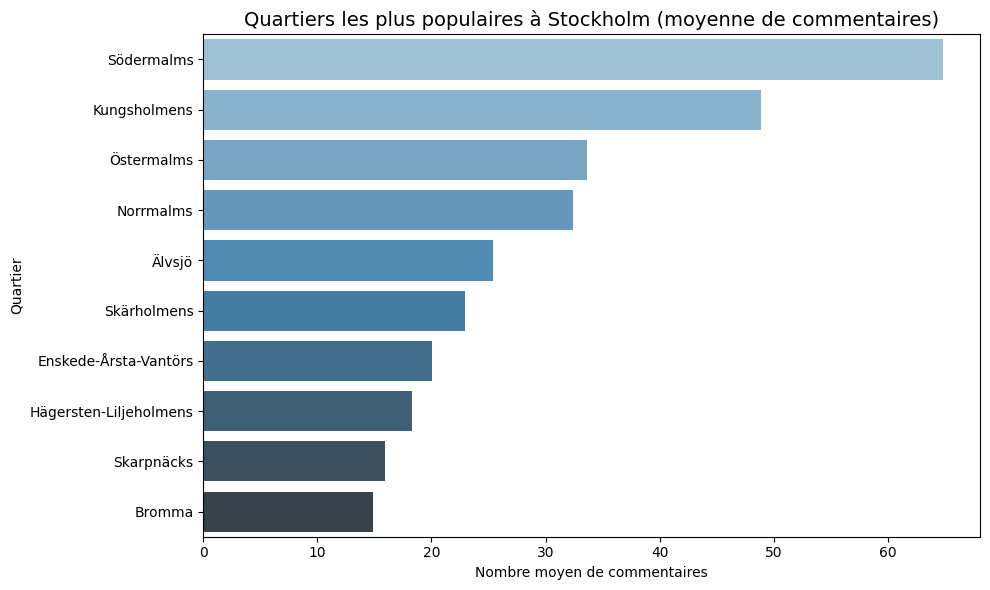

In [32]:
# Moyenne de commentaires par quartier
quartiers_populaires = data_clean.groupby('neighbourhood_cleansed')['number_of_reviews'] \
                                .mean() \
                                .sort_values(ascending=False).head(10)

# Affichage graphique

plt.figure(figsize=(10, 6))
sns.barplot(x=quartiers_populaires.values, y=quartiers_populaires.index, palette="Blues_d")
plt.title("Quartiers les plus populaires à Stockholm (moyenne de commentaires)", fontsize=14)
plt.xlabel("Nombre moyen de commentaires")
plt.ylabel("Quartier")
plt.tight_layout()
plt.show()

##### Analyse courte : Le quartier Södermalms arrive en tête avec une moyenne de près de 65 commentaires par annonce, ce qui montre un fort engagement des voyageurs dans cette zone. Kungsholmens et Östermalms suivent également avec des niveaux élevés d’activité, témoignant de leur attractivité touristique et de la densité des offres Airbnb. En revanche, les quartiers comme Skarpnäcks ou Bromma ont des moyennes plus faibles, ce qui peut refléter une moindre popularité ou une offre plus limitée. Cette répartition nous aide à mieux cibler les zones clés pour les analyses ultérieures.

#### Corrélation entre Prix et Nombre de Commentaires

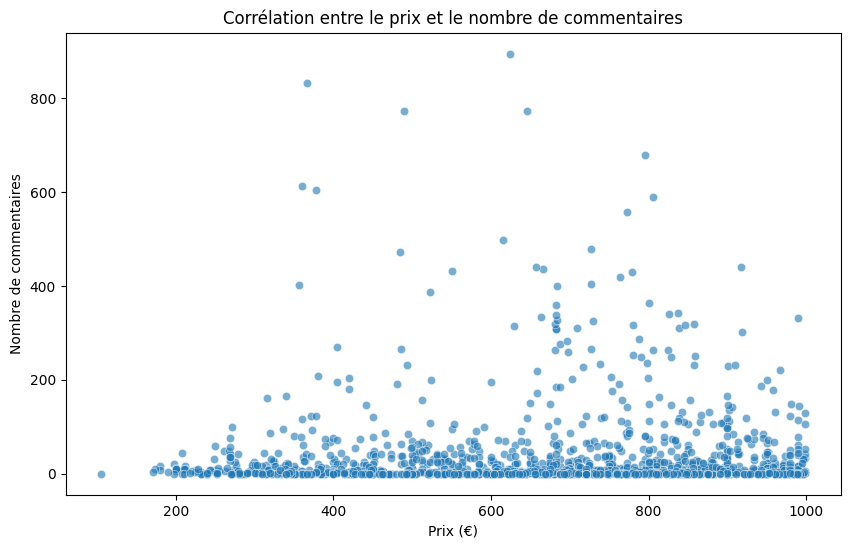

Coefficient de corrélation entre prix et nombre de commentaires : 0.04


In [31]:
# Filtrer les prix trop élevés pour ne pas fausser le graphique
data_filtered = data_clean[data_clean['price'] < 1000]

# Scatter plot prix vs nombre de commentaires
plt.figure(figsize=(10,6))
sns.scatterplot(data=data_filtered, x='price', y='number_of_reviews', alpha=0.6)
plt.title("Corrélation entre le prix et le nombre de commentaires")
plt.xlabel("Prix (€)")
plt.ylabel("Nombre de commentaires")
plt.show()

# Calcul du coefficient de corrélation de Pearson
corr = data_filtered['price'].corr(data_filtered['number_of_reviews'])
print(f"Coefficient de corrélation entre prix et nombre de commentaires : {corr:.2f}")

##### Analyse courte : Le coefficient de corrélation entre le prix et le nombre de commentaires est très faible (0.04), ce qui indique qu’il n’y a pas de lien linéaire significatif entre ces deux variables.Ainsi, le prix d’un logement ne semble pas influencer directement sa popularité en termes de retours clients.

#### Les anomalies sur le prix, sur la disponibilité

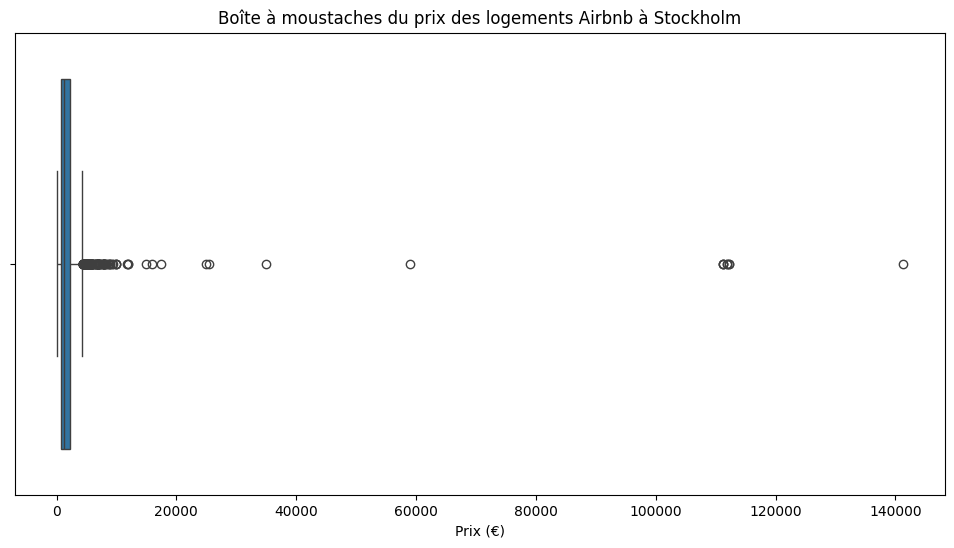

In [33]:
plt.figure(figsize=(12,6))
sns.boxplot(x=data_clean['price'])
plt.title("Boîte à moustaches du prix des logements Airbnb à Stockholm")
plt.xlabel("Prix (€)")
plt.show()

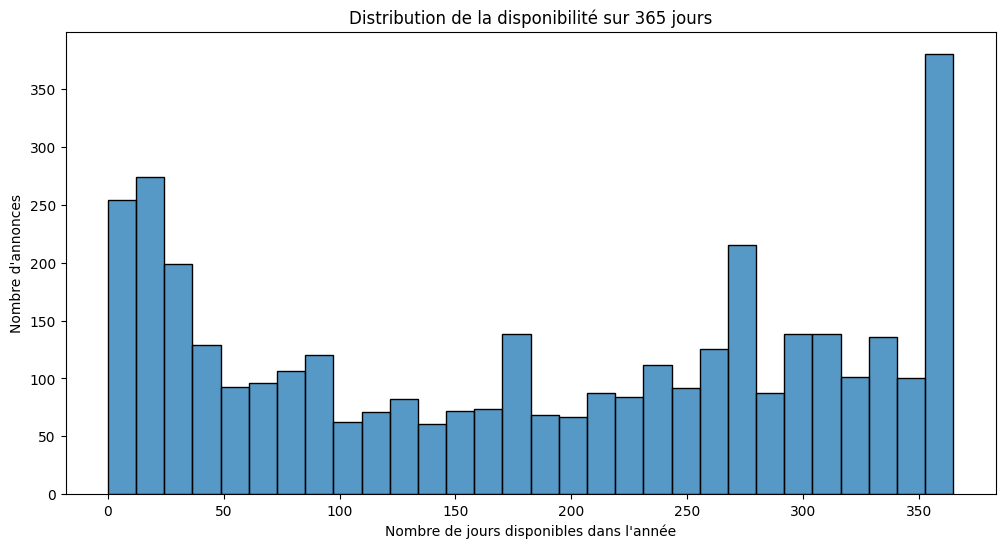

Nombre d'annonces avec 0 jour de disponibilité : 27
Nombre d'annonces avec 365 jours de disponibilité : 117


In [35]:
plt.figure(figsize=(12,6))
sns.histplot(data_clean['availability_365'], bins=30, kde=False)
plt.title("Distribution de la disponibilité sur 365 jours")
plt.xlabel("Nombre de jours disponibles dans l'année")
plt.ylabel("Nombre d'annonces")
plt.show()

# Nombre d'annonces avec 0 ou 365 jours disponibles
zero_dispo = (data_clean['availability_365'] == 0).sum()
full_dispo = (data_clean['availability_365'] == 365).sum()
print(f"Nombre d'annonces avec 0 jour de disponibilité : {zero_dispo}")
print(f"Nombre d'annonces avec 365 jours de disponibilité : {full_dispo}")


##### Analyse courte : L’analyse des prix montre la présence de valeurs extrêmes (outliers), c’est-à-dire des logements dont le prix est très élevé par rapport à la majorité des annonces. Ces outliers peuvent influencer les statistiques globales et doivent être pris en compte avec prudence lors des analyses. Concernant la disponibilité, on note que 27 annonces sont totalement indisponibles (0 jour disponible sur l’année), ce qui peut indiquer des logements inactifs ou retirés du marché. À l’inverse, 117 annonces sont disponibles toute l’année (365 jours), ce qui suggère des logements très actifs ou dédiés à la location longue durée. Ces observations permettront d’affiner les analyses futures en tenant compte de ces cas particuliers.

#### La distribution des types de logements

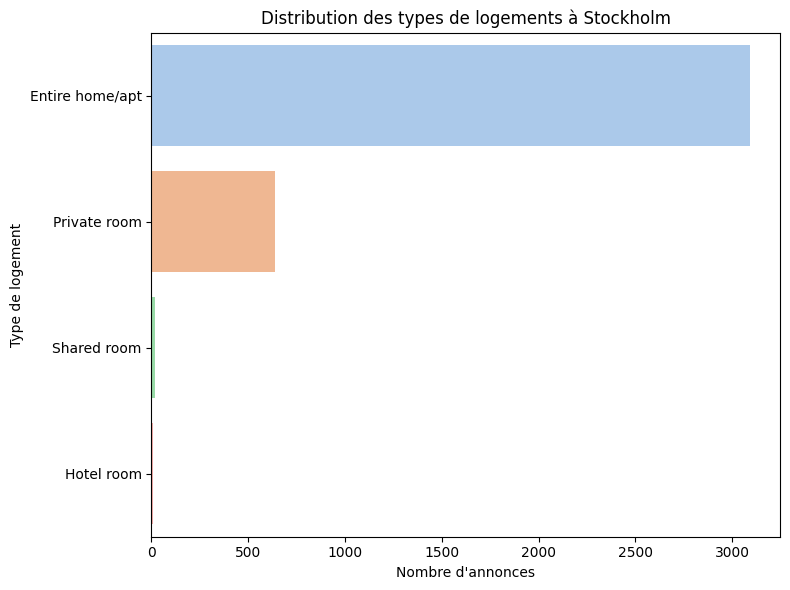

Répartition des types de logements Airbnb :

room_type
Entire home/apt    3092
Private room        639
Shared room          21
Hotel room            9
Name: count, dtype: int64


In [36]:
# Compter les occurrences de chaque type de logement
room_type_counts = data_clean['room_type'].value_counts()

# Affichage graphique
plt.figure(figsize=(8,6))
sns.barplot(x=room_type_counts.values, y=room_type_counts.index, palette='pastel')
plt.title("Distribution des types de logements à Stockholm")
plt.xlabel("Nombre d'annonces")
plt.ylabel("Type de logement")
plt.tight_layout()
plt.show()

# Affichage texte
print("Répartition des types de logements Airbnb :\n")
print(room_type_counts)


##### Analyse courte : La majorité des annonces concernent des logements entiers (Entire home/apt), avec 3 092 annonces, ce qui représente clairement la préférence des hôtes pour louer des espaces complets. Les chambres privées (Private room) constituent la deuxième catégorie la plus importante avec 639 annonces, offrant une option plus économique ou conviviale pour les voyageurs. Les chambres partagées (Shared room) et les chambres d’hôtel (Hotel room) sont beaucoup moins fréquentes, avec respectivement 21 et 9 annonces seulement, ce qui montre leur faible présence sur le marché Airbnb à Stockholm.

### Conclusion partielle — Analyse des données Airbnb à Stockholm

Ce projet nous a permis de nettoyer et d’explorer un jeu de données riche sur les annonces Airbnb à Stockholm.
Nous avons identifié les quartiers les plus populaires, observé qu’il n’existe pas de corrélation forte entre le prix et le nombre de commentaires, et détecté la présence d’outliers sur les prix ainsi que des annonces avec des disponibilités extrêmes.
La majorité des offres concernent des logements entiers, ce qui reflète la tendance actuelle du marché local.
Ces résultats offrent une base solide pour approfondir l’analyse, notamment en détectant les anomalies, en étudiant les profils d’hôtes, ou en réalisant une modélisation prédictive.



## 🩺 <a name="projet2"></a>Projet 2 : Prédiction du diabète

**Données utilisées :** Pima Indians Diabetes Dataset  
**Source :** [Kaggle](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database)

### 🎯 Objectifs :
- Nettoyage des données cliniques (valeurs zéro dans des colonnes critiques).
- Analyse des variables importantes.
- Visualisation des distributions.
- (Bonus) Préparation à la classification.


### Chargement et exploration des données

In [42]:
df_diabetes = pd.read_csv('diabetes.csv')
df_diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [43]:
df_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [44]:
missing = df_diabetes.isnull().sum()
print("Valeurs manquantes par colonne :\n", missing)

Valeurs manquantes par colonne :
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


#### Note : Ce dataset ne contient pas de valeurs manquantes explicites (NaN),mais certaines colonnes critiques (Glucose, BloodPressure, SkinThickness, Insulin, BMI) utilisent la valeur 0 pour représenter des données manquantes ou aberrantes,car 0 n'a pas de sens médical dans ces cas.Nous allons donc remplacer ces 0 par des NaN pour un nettoyage correct.

In [45]:
cols_zero_as_missing = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

df_diabetes[cols_zero_as_missing] = df_diabetes[cols_zero_as_missing].replace(0, np.nan)

print(df_diabetes.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


### Analyse descriptive des variables

In [46]:
df_diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

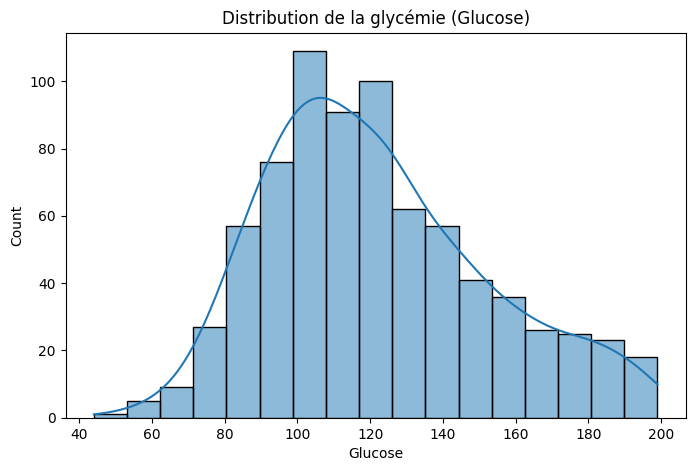

In [47]:
plt.figure(figsize=(8,5))
sns.histplot(df_diabetes['Glucose'].dropna(), kde=True)
plt.title('Distribution de la glycémie (Glucose)')
plt.show

### Analyse des corrélations entre variables

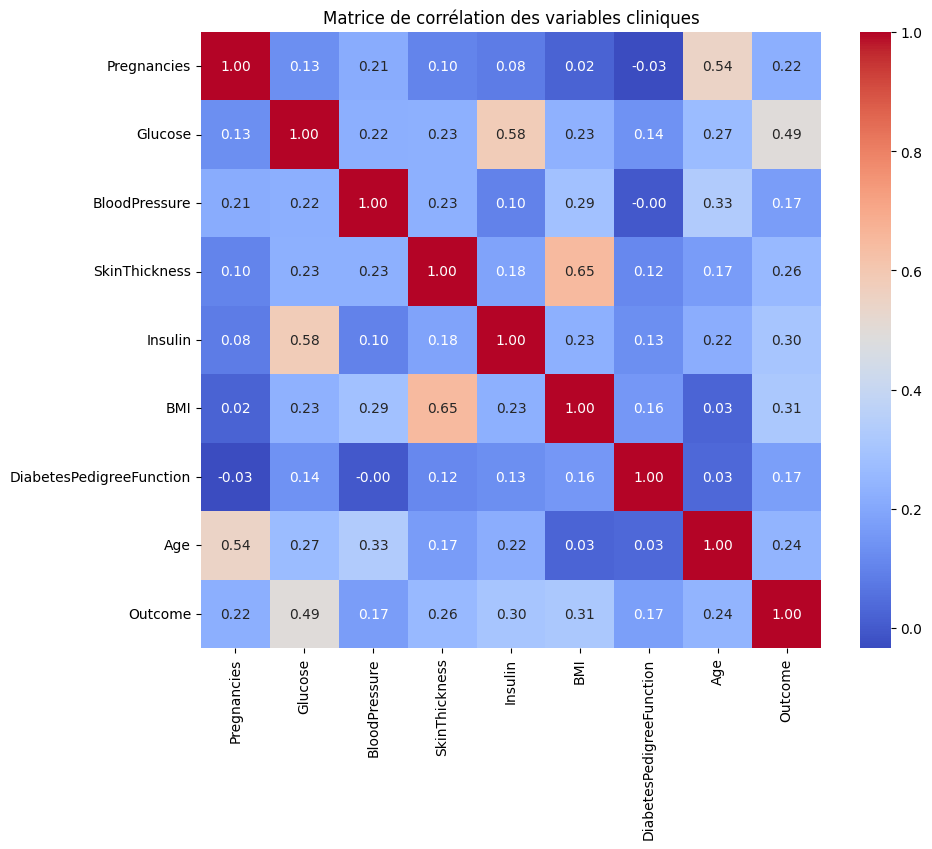

In [48]:
plt.figure(figsize=(10,8))
corr_matrix = df_diabetes.corr()

sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Matrice de corrélation des variables cliniques")
plt.show()

### Préparation des données pour un modèle simple

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# Séparer features et cible
X = df_diabetes.drop('Outcome', axis=1)
y = df_diabetes['Outcome']

# Imputation des valeurs manquantes avec la moyenne
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Division train/test
X_train, X_test, y_train, y_test = train_test_split(
    X_imputed, y, test_size=0.2, random_state=42)

print(f"Taille du jeu d'entraînement : {X_train.shape[0]} échantillons")
print(f"Taille du jeu de test : {X_test.shape[0]} échantillons")

Taille du jeu d'entraînement : 614 échantillons
Taille du jeu de test : 154 échantillons


### Réponses aux questions du projet

1. Colonnes nécessitant un nettoyage urgent
Certaines variables cliniques essentielles telles que Glucose, BloodPressure, SkinThickness, Insulin et BMI contiennent des valeurs codées par zéro qui ne sont pas médicalement valides. Ces zéros ont été traités comme des données manquantes (NaN) afin d’assurer un nettoyage efficace avant toute analyse ou modélisation.

2. Distribution des variables cliniques
L’analyse descriptive montre que les variables comme l’âge, l’IMC (BMI) et la glycémie (Glucose) ont des distributions variées, avec certaines asymétries naturelles dues aux profils de la population étudiée. Par exemple, la glycémie présente une distribution légèrement biaisée vers les valeurs élevées, indiquant la présence de cas à risque.

3. Corrélations entre variables
La matrice de corrélation met en évidence plusieurs relations significatives entre les variables cliniques, notamment une corrélation modérée entre l’IMC et la pression artérielle. Ces corrélations sont importantes pour comprendre les facteurs combinés influençant le diabète.

4. Identification des profils à haut risque
Avant même d’entraîner un modèle prédictif, certains profils à risque peuvent être repérés grâce à des seuils élevés de glucose, un IMC élevé, un âge avancé ou des antécédents familiaux (DiabetesPedigreeFunction). Ces indicateurs facilitent la détection précoce des patients potentiellement diabétiques.

### Conclusion partielle — Prédiction du diabète
Ce projet a permis d’explorer et de nettoyer un jeu de données clinique essentiel pour la prédiction du diabète.
Nous avons identifié et traité les valeurs aberrantes codées par des zéros, analysé la distribution des variables clés, et mis en lumière des corrélations importantes entre ces variables.
Avant même d’entraîner un modèle, il est possible de repérer des profils à haut risque grâce à certains indicateurs cliniques.
La préparation des données a été réalisée en vue de construire un modèle de classification, étape clé pour la suite de ce projet.

## <a name="conclusion"></a>Conclusion

Ces deux projets ont offert une excellente occasion d’appliquer les compétences en analyse de données et en machine learning sur des jeux de données concrets et variés.

Le premier projet, portant sur les annonces Airbnb à Stockholm, a permis de maîtriser le nettoyage des données, la gestion des valeurs manquantes, la détection d’anomalies, ainsi que l’analyse exploratoire pour comprendre les tendances locales du marché immobilier.

Le second projet, centré sur la prédiction du diabète à partir de données cliniques, a approfondi les étapes de préparation de données, la gestion de valeurs aberrantes codées, l’analyse statistique et la mise en place d’un modèle de classification simple.

Ces expériences combinées renforcent la capacité à manipuler, analyser et modéliser des données dans des contextes très différents, tout en développant un regard critique sur la qualité des données et les résultats obtenus. Elles constituent une base solide pour des projets plus avancés en data science et intelligence artificielle.